# Homework 1: crack Alex's phone code

### Rules:
 - You should write the solution in this notebook and upload the completed notebook on Moodle by the deadline.
 - You are not allowed to work in groups, every student should submit their own notebook. If you submit two highly overlapping notebooks with another student, you will both be penalized.
 - The bonus questions are optional. They are not needed to get the full grade, but they can help you to get a higher grade.

### The setting

Your friend Alex wants to hide a secret code in a probability distribution. The probability density function is a piecewise linear distribution with parameters $0<a\le b$, defined as
$$p(x;a,b) = H(a,b) \begin{cases} \frac{x}{a} & \text{if } 0 \leq x \leq a, \\ \frac{b-x}{b-a} & \text{if } a \leq x \leq b, \\ 0 & \text{otherwise.} \end{cases}$$
where $H(a,b)$ is a normalization constant. Alex has choosen $a$ and $b$ such that they are the first two and the last two digits of his phone secret code, respectively.
For example, if their secret code is 1234, then $a=12$ and $b=34$. Alex stores some sample values of the distribution in a file called on their computer, thinking that nobody will be able to understand the distribution without the secret code.

You recently enrolled at EPFL and you are taking the course of _Fundamental of Inference and Learning_, and you want to prove that Alex's phone code is not safe. In this problem, your goal is to discover the secret code by studying the distribution.

## Part 1: Properties of the distribution

In [1]:
import numpy as np
import matplotlib.pyplot as plt

The distribution $p(x;a,b)$ is a valid distribution, i.e., it is normalized and it is non-negative. In this part, you will find many properties of the distribution.

 - **Question 1.** Find the normalization constant $H(a,b)$.

For determining the normalization constant, one can use the property: $ \int_{-\infty}^{\infty}p(x;a,b){dx}=1$. Thus, by replacing the pdf form, it can be obtained:

$$ H(a,b)\left(\int_{0}^{a}\frac{x}{a}{dx} + \int_{a}^{b}\frac{b-x}{b-a}{dx}\right)=1 $$

$$ H(a,b)\left(\frac{a}{2}+\frac{b-a}{2}\right)=1 $$

Therefore, 
$$ H(a,b) = \frac{2}{b}$$


- **Question 2.** Compute the expected value $\mu$ of the distribution.

The expected value is calculated using the: $\mu=\int_{-\infty}^{\infty}xp(x;a,b){dx}$.
$$\mu = \frac{2}{b}\left(\int_{0}^{a}\frac{x^2}{a}{dx} + \int_{a}^{b}\frac{bx-x^2}{b-a}{dx}\right) = \frac{2}{b}\left(\frac{a^2}{3} + \frac{3b^3-2b^3-3ba^2+2a^3}{6(b-a)}\right)=\frac{a+b}{3}$$


- **Question 3.** Compute the _cumulative density function_ $F(t)$ of the distribution.

For $x\le0$ the cumulative density function is $F(x; a, b)=0$. 

Next, for $0<x\le a$, cumulative density function is equal to:
$$F(x;a,b)=\int_{-\infty}^{x}f(x){dx} = \frac{2}{b}\int_{0}^{x}\frac{x}{a}{dx} = \frac{x^2}{ab}$$

For $a<x\le b$, it can be computed that:
$$F(x;a,b)=\frac{2}{b}\int_{0}^{a}\frac{x}{a}{dx} + \frac{2}{b}\int_{a}^{x}\frac{b-x}{b-a}{dx}=\frac{a}{b}+\frac{2bx-x^2-2ba+a^2}{b(b-a)}=\frac{2bx-x^2-ab}{b(b-a)}$$

Therefore,

$$
F(x;a,b) =  \left\{\begin{matrix}
0, & x\le 0 \\
\frac{x^2}{ab}, & 0<x\le a \\
\frac{2bx-x^2-ba}{b(b-a)}, & a<x\le b \\
1, & x> b\\
\end{matrix}\right.
$$


* **Question 4.** Compute the median $m$ of the distribution. (Be careful, there are some special cases to consider according to the value $a$ and $b$)

Median $m$ is computed by solving the following equation:

$$\frac{2}{b}\int_{-\infty}^{m}\frac{x}{a}{dx} = \frac{2}{b}\int_{m}^{\infty}\frac{x}{a}{dx}$$

Note that $m$ can only take value from the range $[0,b]$. Now, let's consider two cases:

1) $0\le m \le a$:

    $$\frac{2}{b}\int_{0}^{m}\frac{x}{a}{dx} = \frac{2}{b}\left(\int_{m}^{a}\frac{x}{a}{dx} + \int_{a}^{b}\frac{b-x}{b-a}{dx}\right)$$
    $$\frac{m^2}{2a}=\frac{a}{2}-\frac{m^2}{2a}+\frac{b^2-2ab+a^2}{2(b-a)}$$
    $$m=\sqrt{\frac{ab}{2}}$$

    Median can have this value only if $0\le\sqrt{\frac{ab}{2}}\le a$, or $b\le 2a$.

2) $a\le m \le b$ and $b \ge 2a$:
    $$\frac{2}{b}\left(\int_{0}^{a}\frac{x}{a}{dx} + \int_{a}^{m}\frac{b-x}{b-a}{dx}\right) = \frac{2}{b}\int_{m}^{b}\frac{b-x}{b-a}{dx}$$
    $$2m^2-4bm+b^2+ab=0$$
    $$m=\frac{4b\pm \sqrt{8(b^2-ab)}}{4}=b-\frac{1}{2}\sqrt{2b(b-a)}$$

    One solution is discarded as the condition is $m\le b$.

    $$a\le b-\frac{1}{2}\sqrt{2b(b-a)} \le b$$
    $$0\le\sqrt{2b(b-a)}\le 2(b-a)$$

    By solving this inequality, it can be obtained that indeed $b\ge 2a$.

- **Question 5.** Are the expected value and the median equal? How do the compare with the mode of the distribution? Comment the results.

The expected value and median are not equal for each value of $a$ and $b$. They are equal when:

1. $\frac{b+a}{3}=\sqrt{\frac{ab}{2}}$ which happens for $b=2a$ (when the median and mean are equal to $a$)
2. $\frac{b+a}{3}=\frac{1}{2}\sqrt{2b(b-a)}$ which also happens only for $b=2a$ (again, median and mean are equal to $a$).

The mode of the distribution is equal to the value of $x$ for which the pdf attains the maximum value. For any value of $a$ and $b$, the mode is equal to $a$. Therefore, all three are equal only under the condition that $b=2a$.

## Part 2: Discovering the secret code from samples
You have seen Alex typing the code once, and you know that the last 2 digits are "20", hence $b=20$, and your goal is to estimate the first two digits $a^\star$. In this part, you can work as if you knew the value of $b$, and the distribution depends only on $a$. You also got the file `fixed_b.npy`with samples coming from the distribution $p(x;a=a^\star, b=20)$ that your friend Alex stored in the computer.

- **Question 6.** Implement a function `pdf(x, a, b=20)` that computes the probability density function $p(x;a,20)$, and plot it for $b=20$ and $a$ of your choice.

In [2]:
def pdf(x, a, b=20):
    if a == 0:
        return np.where(x < 0, 0, np.where(x <= b, 2*(b - x)/b**2, 0))
    
    if a == b:
        return np.where(x < 0, 0, np.where(x <= a, 2*x/b**2, 0))
    
    if b < a:
        return 0
    
    return np.where(x < 0, 0, np.where(x <= a, 2*x/(a*b), np.where(x <= b, 2*(b - x)/(b*(b - a)), 0)))

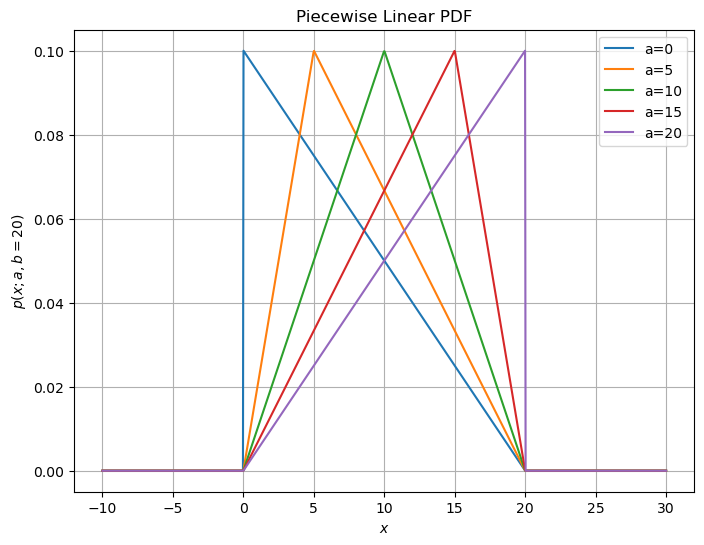

In [3]:
a_values = [0, 5, 10, 15, 20]
x = np.linspace(-10, 30, 1000)

plt.figure(figsize=(8, 6))
plt.title('Piecewise Linear PDF')
plt.xlabel('$x$')
plt.ylabel('$p(x; a, b = 20)$')

for a in a_values:
    plt.plot(x, pdf(x, a), label=f'a={a}')
    
plt.legend()
plt.grid(True)
plt.show()

- **Question 7** How many sample points are there in the file? Let us call this number $n$ and plot an histogram of the data

Number of samples: 100


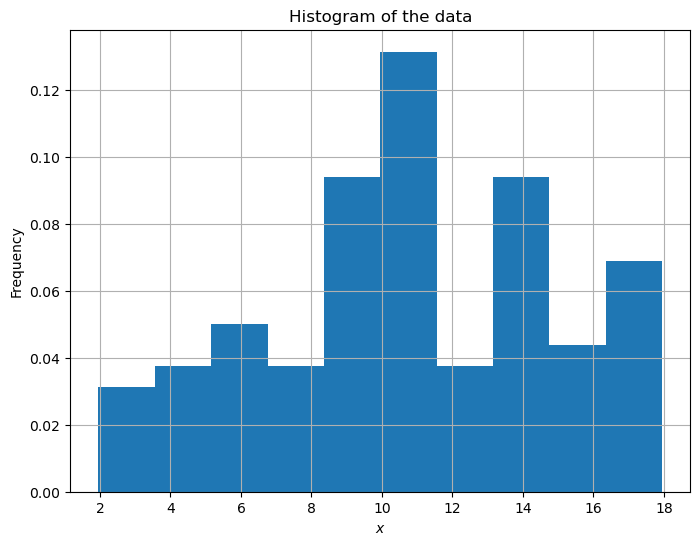

In [4]:
x_fixed_b = np.load('fixed_b.npy')
n = len(x_fixed_b)
print('Number of samples:', len(x_fixed_b))

plt.figure(figsize=(8, 6))
plt.title('Histogram of the data')
plt.xlabel('$x$')
plt.ylabel('Frequency')
plt.hist(x_fixed_b, bins=10, density=True)
plt.grid(True)
plt.show()

- **Question 8.** Compute the empirical mean $\bar x$ and the empirical median $\bar m$. 

In [5]:
mean = np.mean(x_fixed_b)
print('Empirical mean:', mean)

median = np.median(x_fixed_b)
print('Empirical median:', median)

Empirical mean: 10.739751742853539
Empirical median: 10.700494688840413


- **Question 9.** Use the expression of the expected value you computed above to find an estimator $\hat a_\text{mean}$ of the true parameter $a^\star$, as a function of the empirical mean $\bar x$. Repeat the same for the median, and find $\hat a_\text{median}$ as a function of the empirical median $\bar m$.

Estimator based on the empirical mean will be:
$$\bar{x} = \frac{\hat{a}_\text{mean}+b}{3}$$
$$\hat{a}_\text{mean} = 3\bar{x}-b$$

Similarily, for the estimator based on median we get:

$$\hat{a}_\text{median} = \left\{\begin{matrix}
\frac{1}{b}2\bar{m}^2, &  b\le 2m \\
\frac{1}{b}(4b\bar{m}-b^2-2\bar{m}^2), & b\ge 2m \\
\end{matrix}\right.
$$

- **Question 10.** Implement a function `est_a_mean(x_bar, b=20)` and `est_a_median(m_bar, b=20)` that code the estimators you found above. What are the vaules of $\hat a_\text{mean}$ and $\hat a_\text{median}$ for the data you have in the file `fixed_b.npy`?

In [6]:
def est_a_mean(x_bar, b=20):
    return 3 * x_bar - b

def est_a_median(m_bar, b=20):
    m_bar = np.asarray(m_bar)
    result = np.where(m_bar <= b / 2, 2 * m_bar**2 / b, (4 * b * m_bar - b**2 - 2 * m_bar**2) / b)
    return result

a_mean = est_a_mean(mean)
print('Estimated a using the mean:', a_mean)

a_median = est_a_median(median)
print('Estimated a using the median:', a_median)


Estimated a using the mean: 12.219255228560613
Estimated a using the median: 11.351920096771465


 - **Question 11.** Consider the log-likelihood function $\mathcal{L}(a;\{x_i\}_{i\in[1,n]},b=20)$. Plot the log-likelihood function as a function of $a$ for the data in the file `fixed_b.npy`.

C:\Users\jovan\AppData\Local\Temp\ipykernel_10864\3264075711.py:2: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(pdf(x, a, b)))


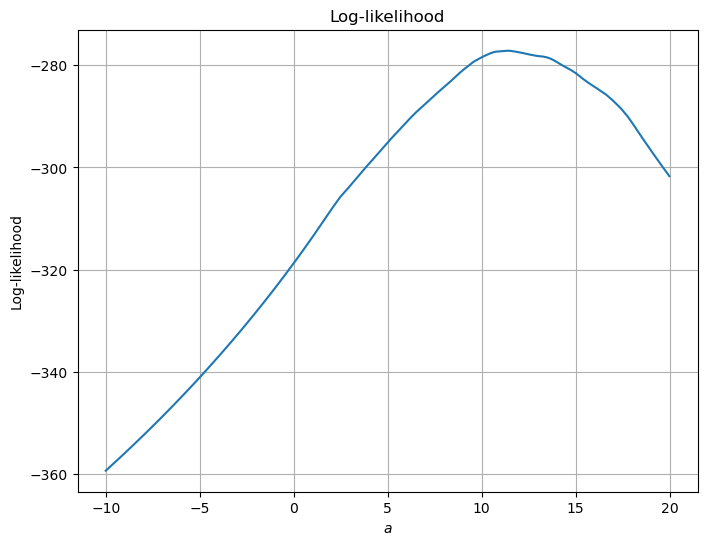

In [7]:
def log_likelihood(x, a, b=20):
    return np.sum(np.log(pdf(x, a, b)))

a_values = np.linspace(-10, 30, 1000)
log_likelihoods = [log_likelihood(x_fixed_b, a) for a in a_values]

plt.figure(figsize=(8, 6))
plt.title('Log-likelihood')
plt.xlabel('$a$')
plt.ylabel('Log-likelihood')
plt.plot(a_values, log_likelihoods)
plt.grid(True)
plt.show()

 - **Question 12.** What is the maximum likelihood estimator $\hat a_\text{MLE}$?

In [8]:
a_hat = a_values[np.argmax(log_likelihoods)]

print('Estimated a using the log-likelihood:', a_hat)

Estimated a using the log-likelihood: 11.381381381381381


- **Question 13.** Use bootstrapping to compute the 95% confidence interval for all the three $a$ estimators computed above.

In [9]:
def bootstrap(x, n=1000):
    n_samples = len(x)
    samples = np.random.choice(x, (n, n_samples), replace=True)
    return samples

def bootstrap_est_a_mean(x, n=1000):
    samples = bootstrap(x, n)
    means = np.mean(samples, axis=1)
    return est_a_mean(means)

def bootstrap_est_a_median(x, n=1000):
    samples = bootstrap(x, n)
    medians = np.median(samples, axis=1)
    return est_a_median(medians)

def bootstrap_log_likelihood(x, n=1000):
    samples = bootstrap(x, n)
    a_values = np.linspace(-10, 30, 1000)
    result = np.zeros(n)
    for i in range(n):
        log_likelihoods = [log_likelihood(samples[i], a) for a in a_values]
        result[i] = a_values[np.argmax(log_likelihoods)]

    return result

n_bootstrap = 1000

a_mean_bootstrap = bootstrap_est_a_mean(x_fixed_b, n_bootstrap)
a_mean_bootstrap.sort()
lower_mean = a_mean_bootstrap[int(0.025 * n_bootstrap)]
upper_mean = a_mean_bootstrap[int(0.975 * n_bootstrap)]
print('95% confidence interval for the mean estimator:', lower_mean, upper_mean)

a_median_bootstrap = bootstrap_est_a_median(x_fixed_b, n_bootstrap)
a_median_bootstrap.sort()
lower_median = a_median_bootstrap[int(0.025 * n_bootstrap)]
upper_median = a_median_bootstrap[int(0.975 * n_bootstrap)]
print('95% confidence interval for the median estimator:', lower_median, upper_median)

log_likelihood_bootstrap = bootstrap_log_likelihood(x_fixed_b, n_bootstrap)
log_likelihood_bootstrap.sort()
lower_log_likelihood = log_likelihood_bootstrap[int(0.025 * n_bootstrap)]
upper_log_likelihood = log_likelihood_bootstrap[int(0.975 * n_bootstrap)]
print('95% confidence interval for the log-likelihood estimator:', lower_log_likelihood, upper_log_likelihood)



95% confidence interval for the mean estimator: 9.932149850539403 14.614316550337946
95% confidence interval for the median estimator: 9.921090319488409 12.821185580949287


C:\Users\jovan\AppData\Local\Temp\ipykernel_10864\3264075711.py:2: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(pdf(x, a, b)))


95% confidence interval for the log-likelihood estimator: 10.06006006006006 13.823823823823822


 - **Question 14.** Compute the Fisher information of $a$ under the distribution $p(x;a,b=20)$.
 

In [10]:
def Fisher_information(a, b=20):
    if a <= 0 or a >= b: return 0
    return (-7*a**2 + 6*a*b - 2*b**2) / (3 * a**2 * (a-b)**3)

- **Question 15.** Can you compute the maximum likelihood estimator using the Jeffrey Posterior $\hat a_\text{jeff}$? Provide also the confidence intervals.

Estimated a using the Jeffrey Posterior: 11.511511511511511


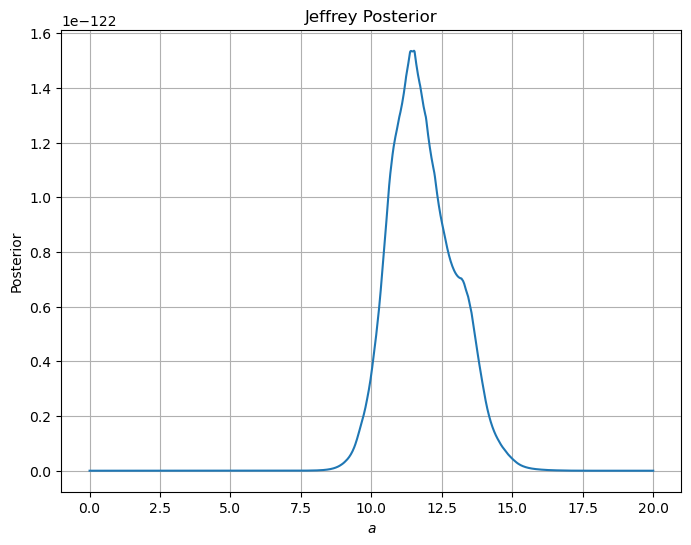

95% confidence interval for the Jeffrey Posterior estimator: 10.09009009009009 14.934934934934935


In [18]:
a_values = np.linspace(0, 20, 1000)
Fisher_values = np.array([n * Fisher_information(a) for a in a_values])
Jeffrey_prior = np.sqrt(Fisher_values)
Jeffrey_posterior = np.array([pdf(x_fixed_b, a, 20).prod() for a in a_values]) * Jeffrey_prior
a_hat_Jeffrey = a_values[np.argmax(Jeffrey_posterior)]
print('Estimated a using the Jeffrey Posterior:', a_hat_Jeffrey)

plt.figure(figsize=(8, 6))
plt.title('Jeffrey Posterior')
plt.xlabel('$a$')
plt.ylabel('Posterior')
plt.plot(a_values, Jeffrey_posterior)
plt.grid(True)
plt.show()

n_bootstrap = 1000
Jeffrey_posterior_bootstrap = np.zeros(n_bootstrap)
for i in range(n_bootstrap):
    x_bootstrap = np.random.choice(x_fixed_b, len(x_fixed_b), replace=True)
    Jeffrey_posterior_bootstrap[i] = a_values[np.argmax(np.array([pdf(x_bootstrap, a, 20).prod() for a in a_values]) * Jeffrey_prior)]

Jeffrey_posterior_bootstrap.sort()
lower_Jeffrey = Jeffrey_posterior_bootstrap[int(0.025 * n_bootstrap)]
upper_Jeffrey = Jeffrey_posterior_bootstrap[int(0.975 * n_bootstrap)]
print('95% confidence interval for the Jeffrey Posterior estimator:', lower_Jeffrey, upper_Jeffrey)

All the estimation you derived couldn't find the secret code with absolute certainty. The confidence intervals you computed are too large to produce one single code. Moreover your friend is a bit paranoid and changes the code every week, so the information you have is not valid anymore. You need to find a better way to estimate the code.

### Test the estimators
You are still trying to sneak into your friend's computer to get new samples of the distribution. In the meanwhile, you want to test the estimators you derived on a synthetic dataset. Florent gave you this Python function to sample the distribution $p(x;a,b)$:


In [19]:
import numpy as np
import matplotlib.pyplot as plt

def sample(a: float, b: float, size: int=1) -> np.array:
    def sample_single(a: float, b: float) -> float:
        u = 0
        v = b
        while not((u <= a and v <= 2/(a*b)*u) or (u > a and v <= 2/b *(b-u)/(b-a))):
            u = np.random.uniform(0, b)
            v = np.random.uniform(0, 2/b)
        return u
    return np.array([sample_single(a, b) for _ in range(size)])

- **Bonus question 1** The sampling function is not efficient. Can you provide a more efficient way to sample the distribution?

In [15]:
def inverse_cdf(x, a, b):
    return np.where(x < 0, 0, np.where(x <= a/b, np.sqrt(a*b*x), b - np.sqrt(b**2 - a*b - x*b*(b-a))))

def sample_from_piecewise_linear_pdf(a, b, num_samples):
    u = np.random.uniform(0, 1, num_samples)
    samples = inverse_cdf(u, a, b)
    return samples


Stick with the case where $b=20$, and sample $N=1000$ points from the distribution $p(x;a,b)$ for 10 values of $a\in[0,20]$.
- **Question 16.** Compute and plot the mean squared error of the 4 estimators for $\hat a_\text{mean}, \hat a_\text{median}, \hat a_\text{ML}$ and $\hat a_\text{Jeff}$, as well as the Cramér-Rao lower bound. Which one is the best? [Hint: to have a good estimate of the mean squared error, you can repeat the sampling 300 times and compute the average of the squared error, for each value of $a$; be patient, this will take some time to compute]

C:\Users\jovan\AppData\Local\Temp\ipykernel_10864\1695819264.py:8: RuntimeWarning: divide by zero encountered in scalar divide
  while not((u <= a and v <= 2/(a*b)*u) or (u > a and v <= 2/b *(b-u)/(b-a))):
C:\Users\jovan\AppData\Local\Temp\ipykernel_10864\1695819264.py:8: RuntimeWarning: invalid value encountered in scalar multiply
  while not((u <= a and v <= 2/(a*b)*u) or (u > a and v <= 2/b *(b-u)/(b-a))):
C:\Users\jovan\AppData\Local\Temp\ipykernel_10864\3264075711.py:2: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(pdf(x, a, b)))


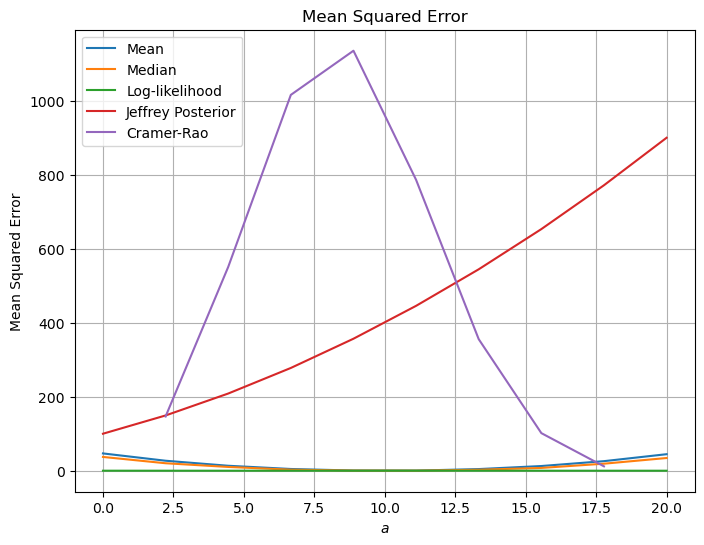

In [34]:
a_values = np.linspace(0, 20, 10)
b = 20
N = 1000

samples = {a: sample(a, b, N) for a in a_values}

def mean_squared_error(true_value, estimated_values):
    return np.mean((estimated_values - true_value)**2)

mean_values = {a: np.mean(samples[a]) for a in a_values}
mean_squared_errors_mean = {a: mean_squared_error(a, mean_values[a]) for a in a_values}

median_values = {a: np.median(samples[a]) for a in a_values}
mean_squared_errors_median = {a: mean_squared_error(a, median_values[a]) for a in a_values}

a_values_mle = np.linspace(-10, 30, 1000)
mle_values = {a: a_values_mle[np.argmax([log_likelihood(samples[a], a_val) for a_val in a_values_mle])] for a in a_values}
mean_squared_errors_mle = {a: mean_squared_error(a, mle_values[a]) for a in a_values}

Jeff_values = {}
Cramer_rao = {}

for a in a_values:
    Fisher = Fisher_information(a, b)
    Jeffrey_prior = np.sqrt(Fisher)
    Jeffrey_posterior = np.array([pdf(samples[a], a, 20).prod() for a in a_values]) * Jeffrey_prior
    Jeff_values[a] = a_values_mle[np.argmax(Jeffrey_posterior)]
    Cramer_rao[a] = 1 / Fisher if Fisher > 0 else np.inf
mean_squared_errors_Jeff = {a: mean_squared_error(a, Jeff_values[a]) for a in a_values}


plt.figure(figsize=(8, 6))
plt.title('Mean Squared Error')
plt.xlabel('$a$')
plt.ylabel('Mean Squared Error')

plt.plot(a_values, list(mean_squared_errors_mean.values()), label='Mean')
plt.plot(a_values, list(mean_squared_errors_median.values()), label='Median')
plt.plot(a_values, list(mean_squared_errors_mle.values()), label='Log-likelihood')
plt.plot(a_values, list(mean_squared_errors_Jeff.values()), label='Jeffrey Posterior')
plt.plot(a_values, list(Cramer_rao.values()), label='Cramer-Rao')

plt.legend()
plt.grid(True)
plt.show()

- **Bonus Question 2.** Why is the Jeffrey's prior estimator so bad? Can you provide a better bound for the variance of the estimator? [Hint: you might need `np.gradient` to solve this question, and increase the number of different values of $a$ to get a finer plot]

### Joint estimation case
You finally managed to get the file `full.npy` with the samples of the distribution $p(x;a,b)$ your friend Alex stored in the computer. You don't know the value of $b$, and you need to estimate both $a^\star$ and $b^\star$. (BE CAREFUL: $a^\star$ is different from the previous case).



- **Question 17.** How many sample points are there in the file? Let us call this number $n$ and plot an histogram of the data.

Number of samples: 10000


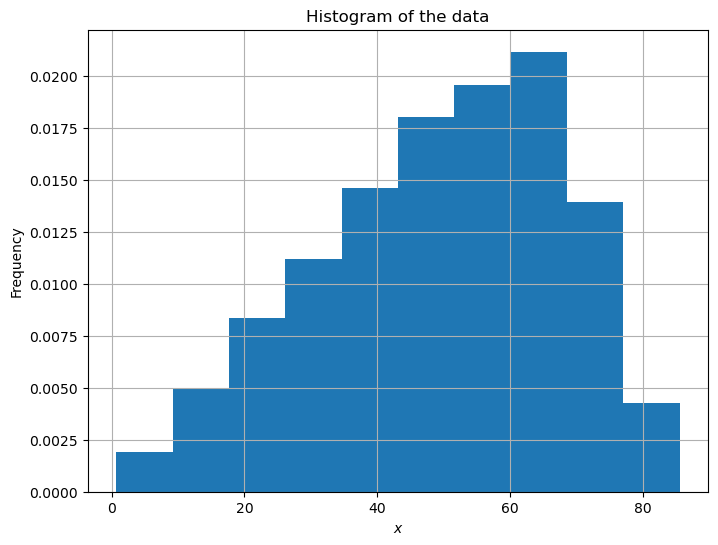

In [21]:
x_full = np.load('full.npy')
n = len(x_full)
print('Number of samples:', len(x_full))

plt.figure(figsize=(8, 6))
plt.title('Histogram of the data')
plt.xlabel('$x$')
plt.ylabel('Frequency')
plt.hist(x_full, bins=10, density=True)
plt.grid(True)
plt.show()

- **Question 18.** Compute the maximum likelihood estimators $\hat a_\text{ML}$ and $\hat b_\text{ML}$ for the data in the file `full.npy`.


In [22]:
def log_likelihood_full(x, a, b):
    if a <= 0 or a >= b:
        return -np.inf
    return np.sum(np.log(pdf(x, a, b)))

def mle(x):
    a_values = np.linspace(0, 100, 100)
    b_values = np.linspace(0, 100, 100)
    log_likelihoods = np.array([[log_likelihood(x, a, b) for a in a_values] for b in b_values])
    a_hat, b_hat = np.unravel_index(np.argmax(log_likelihoods), log_likelihoods.shape)

    return a_values[a_hat], b_values[b_hat]

a_hat, b_hat = mle(x_full)

print('Estimated a using the log-likelihood:', a_hat)
print('Estimated b using the log-likelihood:', b_hat)

C:\Users\jovan\AppData\Local\Temp\ipykernel_10864\2562245898.py:3: RuntimeWarning: divide by zero encountered in divide
  return np.where(x < 0, 0, np.where(x <= b, 2*(b - x)/b**2, 0))
C:\Users\jovan\AppData\Local\Temp\ipykernel_10864\3264075711.py:2: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(pdf(x, a, b)))


Estimated a using the log-likelihood: 85.85858585858587
Estimated b using the log-likelihood: 62.62626262626263


- **Question 19.** Can you provide the confidence intervals for the estimators? Can you guess the secret code of your friend?

In [23]:
def bootstrap_full(x, n=1000):
    n_samples = len(x)
    samples = np.random.choice(x, (n, n_samples), replace=True)
    return samples

def bootstrap_est_a_b(x, n=1000):
    samples = bootstrap_full(x, n)
    a_values = np.zeros(n)
    b_values = np.zeros(n)
    for i in range(n):
        a_values[i], b_values[i] = mle(samples[i])

    return a_values, b_values

n_bootstrap = 1000
a_bootstrap, b_bootstrap = bootstrap_est_a_b(x_full, n_bootstrap)

a_bootstrap.sort()
lower_a = a_bootstrap[int(0.025 * n_bootstrap)]
upper_a = a_bootstrap[int(0.975 * n_bootstrap)]
print('95% confidence interval for the a estimator:', lower_a, upper_a)

b_bootstrap.sort()
lower_b = b_bootstrap[int(0.025 * n_bootstrap)]
upper_b = b_bootstrap[int(0.975 * n_bootstrap)]
print('95% confidence interval for the b estimator:', lower_b, upper_b)


C:\Users\jovan\AppData\Local\Temp\ipykernel_10864\2562245898.py:3: RuntimeWarning: divide by zero encountered in divide
  return np.where(x < 0, 0, np.where(x <= b, 2*(b - x)/b**2, 0))
C:\Users\jovan\AppData\Local\Temp\ipykernel_10864\3264075711.py:2: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(pdf(x, a, b)))


95% confidence interval for the a estimator: 85.85858585858587 85.85858585858587
95% confidence interval for the b estimator: 62.62626262626263 63.63636363636364


- **Bonus Question 3.** Can you find some estimators for $a$ and $b$ that are based on mean and median? Do you expect them to work well? Why?